In [1]:
import numpy as np

In [8]:
class Layer:
    def __init__(self, num_inputs,num_neurons, activation):
        self.num_neurons = num_neurons
        self.activation = activation
        self.weights = np.random.randn(num_inputs, num_neurons)
        self.biases = np.zeros((1, self.num_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.activation(np.dot(inputs, self.weights) + self.biases)
        return self.output

    def backward(self, d_output):
        d_inputs = np.dot(d_output, self.weights.T)
        d_weights = np.dot(self.inputs.T, d_output)
        d_biases = np.sum(d_output, axis=0)
        return d_inputs, d_weights, d_biases


In [9]:
class Network:
    def __init__(self, output_layer):
        self.layers = []
        self.output_layer = output_layer

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, inputs):
        output = inputs
        for layer in self.layers:
            output = layer.forward(output)
        return self.output_layer(output)
    
    def backward(self, d_output):
        d_inputs = d_output
        for layer in reversed(self.layers):
            d_inputs, d_weights, d_biases = layer.backward(d_inputs)
            layer.weights -= d_weights
            layer.biases -= d_biases

In [10]:
def logsumexp(x):
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [11]:
def logsigma(x):
    if isinstance(x, np.ndarray):
        return -logsumexp(np.array([np.zeros(x.shape), -x]))
    return -logsumexp(np.array([0,-x]))


def sigmoid(x):
    return np.exp(logsigma(x))

In [12]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

In [13]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Define the softmax activation function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Define the network architecture
network = Network(output_layer=softmax)
network.add_layer(Layer(num_inputs=4, num_neurons=10, activation=relu))
network.add_layer(Layer(num_inputs=10, num_neurons=10, activation=relu))
network.add_layer(Layer(num_inputs=10, num_neurons=3, activation=tanh))

accuracies = []
# Train the network
for epoch in range(1000):
    # Forward pass
    output = network.forward(X_train)
    # Backward pass
    d_output = output - y_train_encoded
    network.backward(d_output)
    
    # Evaluate the network
    predictions = np.argmax(output, axis=1)
    accuracy = accuracy_score(y_train, predictions)
    accuracies.append(accuracy) 

output = network.forward(X_test)
predictions = np.argmax(output, axis=1)
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy:", accuracy)


Test accuracy: 0.3333333333333333


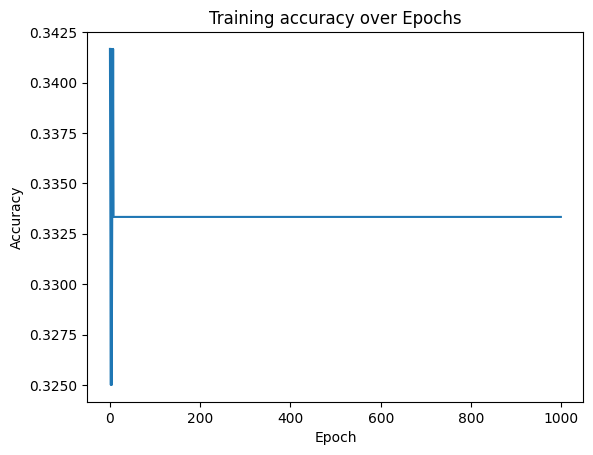

In [14]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.title('Training accuracy over Epochs')
plt.show()